<a href="https://colab.research.google.com/github/jeedorsa/DaVinciBrain/blob/edison_branch/xgboost_pasantia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from google.colab import drive
drive.mount('content/')

Drive already mounted at content/; to attempt to forcibly remount, call drive.mount("content/", force_remount=True).


In [29]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, recall_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from sklearn.compose import make_column_selector, make_column_transformer
from tensorflow.keras.layers import Dense, Dropout
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

In [30]:
df = pd.read_csv('/content/content/MyDrive/Colab Notebooks/address_cleaned.csv')

In [31]:
df1 = df[['Entrenamiento','Ubicacion','Estatus laboral','Horario de los bootcamps','Egresado_Egresado','Primer contacto_Instagram','Primer contacto_WhatsApp','Condiciones de pago_Completo','Condiciones de pago_Cuotas']]

In [32]:
y = df1['Egresado_Egresado']
X = df1.drop('Egresado_Egresado', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [33]:
cat_selector = make_column_selector(dtype_include='object')
num_selector =  make_column_selector(dtype_include='number')


In [34]:
ohe = OneHotEncoder(sparse=False,handle_unknown='ignore')
scaler = StandardScaler()



In [35]:
# Numeric pipeline
numeric_pipe = make_pipeline(scaler)
numeric_pipe

Pipeline(steps=[('standardscaler', StandardScaler())])

In [36]:
# Categorical pipeline
categorical_pipe = make_pipeline(ohe)
categorical_pipe

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [37]:
# Tuples para Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9c56483070>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9c56480250>)])

In [38]:
# fit on train
preprocessor.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9c56483070>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9c56480250>)])

In [39]:
# transform train and test
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

In [40]:
X_train

array([[-0.46466019,  0.41931393, -0.41931393, ...,  0.        ,
         1.        ,  0.        ],
       [ 2.15211035,  0.41931393, -0.41931393, ...,  0.        ,
         0.        ,  0.        ],
       [ 2.15211035,  0.41931393, -0.41931393, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 2.15211035,  0.41931393, -0.41931393, ...,  0.        ,
         0.        ,  0.        ],
       [-0.46466019,  0.41931393, -0.41931393, ...,  0.        ,
         0.        ,  0.        ],
       [-0.46466019,  0.41931393, -0.41931393, ...,  0.        ,
         0.        ,  0.        ]])

In [41]:
model = XGBClassifier()

In [42]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [43]:
import matplotlib.pyplot as plt

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

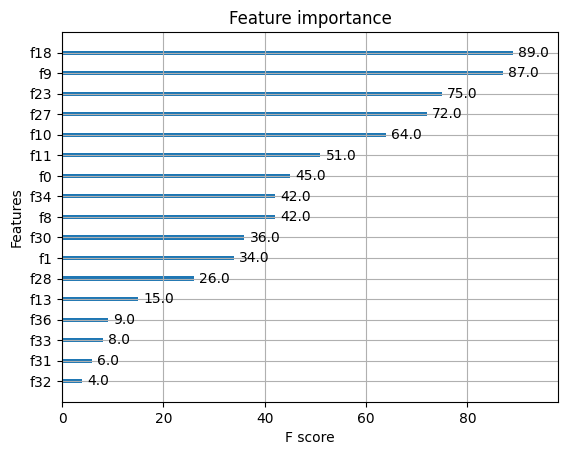

In [44]:
xgb.plot_importance(model, ax=plt.gca()) # Visualizar la variables que mas toma encuenta el clasificador

In [45]:
pred =  model.predict(X_test)

In [52]:
model.score(X_train, y_train)

0.822429906542056

In [54]:
print(X_train.shape)
print(y_train.shape)
print(pred.shape)



(107, 37)
(107,)
(53,)


In [50]:
from sklearn.metrics import confusion_matrix

In [55]:
confusion_matrix(y_test, pred)

array([[ 4,  5],
       [ 5, 39]])

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [66]:
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

         0.0       0.44      0.44      0.44         9
         1.0       0.89      0.89      0.89        44

    accuracy                           0.81        53
   macro avg       0.67      0.67      0.67        53
weighted avg       0.81      0.81      0.81        53



<Figure size 640x480 with 0 Axes>

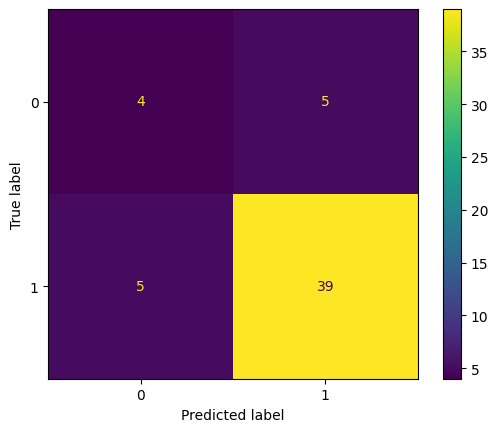

In [63]:
cm = confusion_matrix(y_test,pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure()
disp.plot()
plt.show()